# Task 4 : GLobal Terrorism Act

# Author: Vibhuti Mayekar 

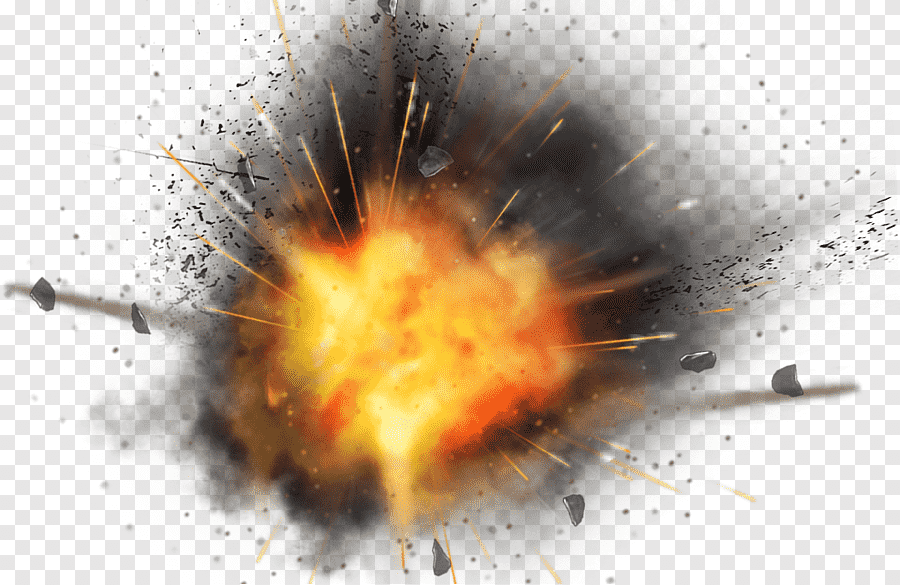

In [24]:
from PIL import Image 
im = Image.open(r"F:\\Vibhuti\\business analytics and intelligence\\Internshala\\internshipwork_grip\\bomb.png") 
im

In [3]:
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
os.chdir("F:\\Vibhuti\\business analytics and intelligence\\Internshala\\internshipwork_grip")
#df = pd.read_csv('internshipwork_grip.csv')

In [4]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

In [169]:
df.head(4)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  

[4 rows x 135 columns]

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [145]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [146]:
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [9]:
#df['iyear'].value_counts()

# Heatmap

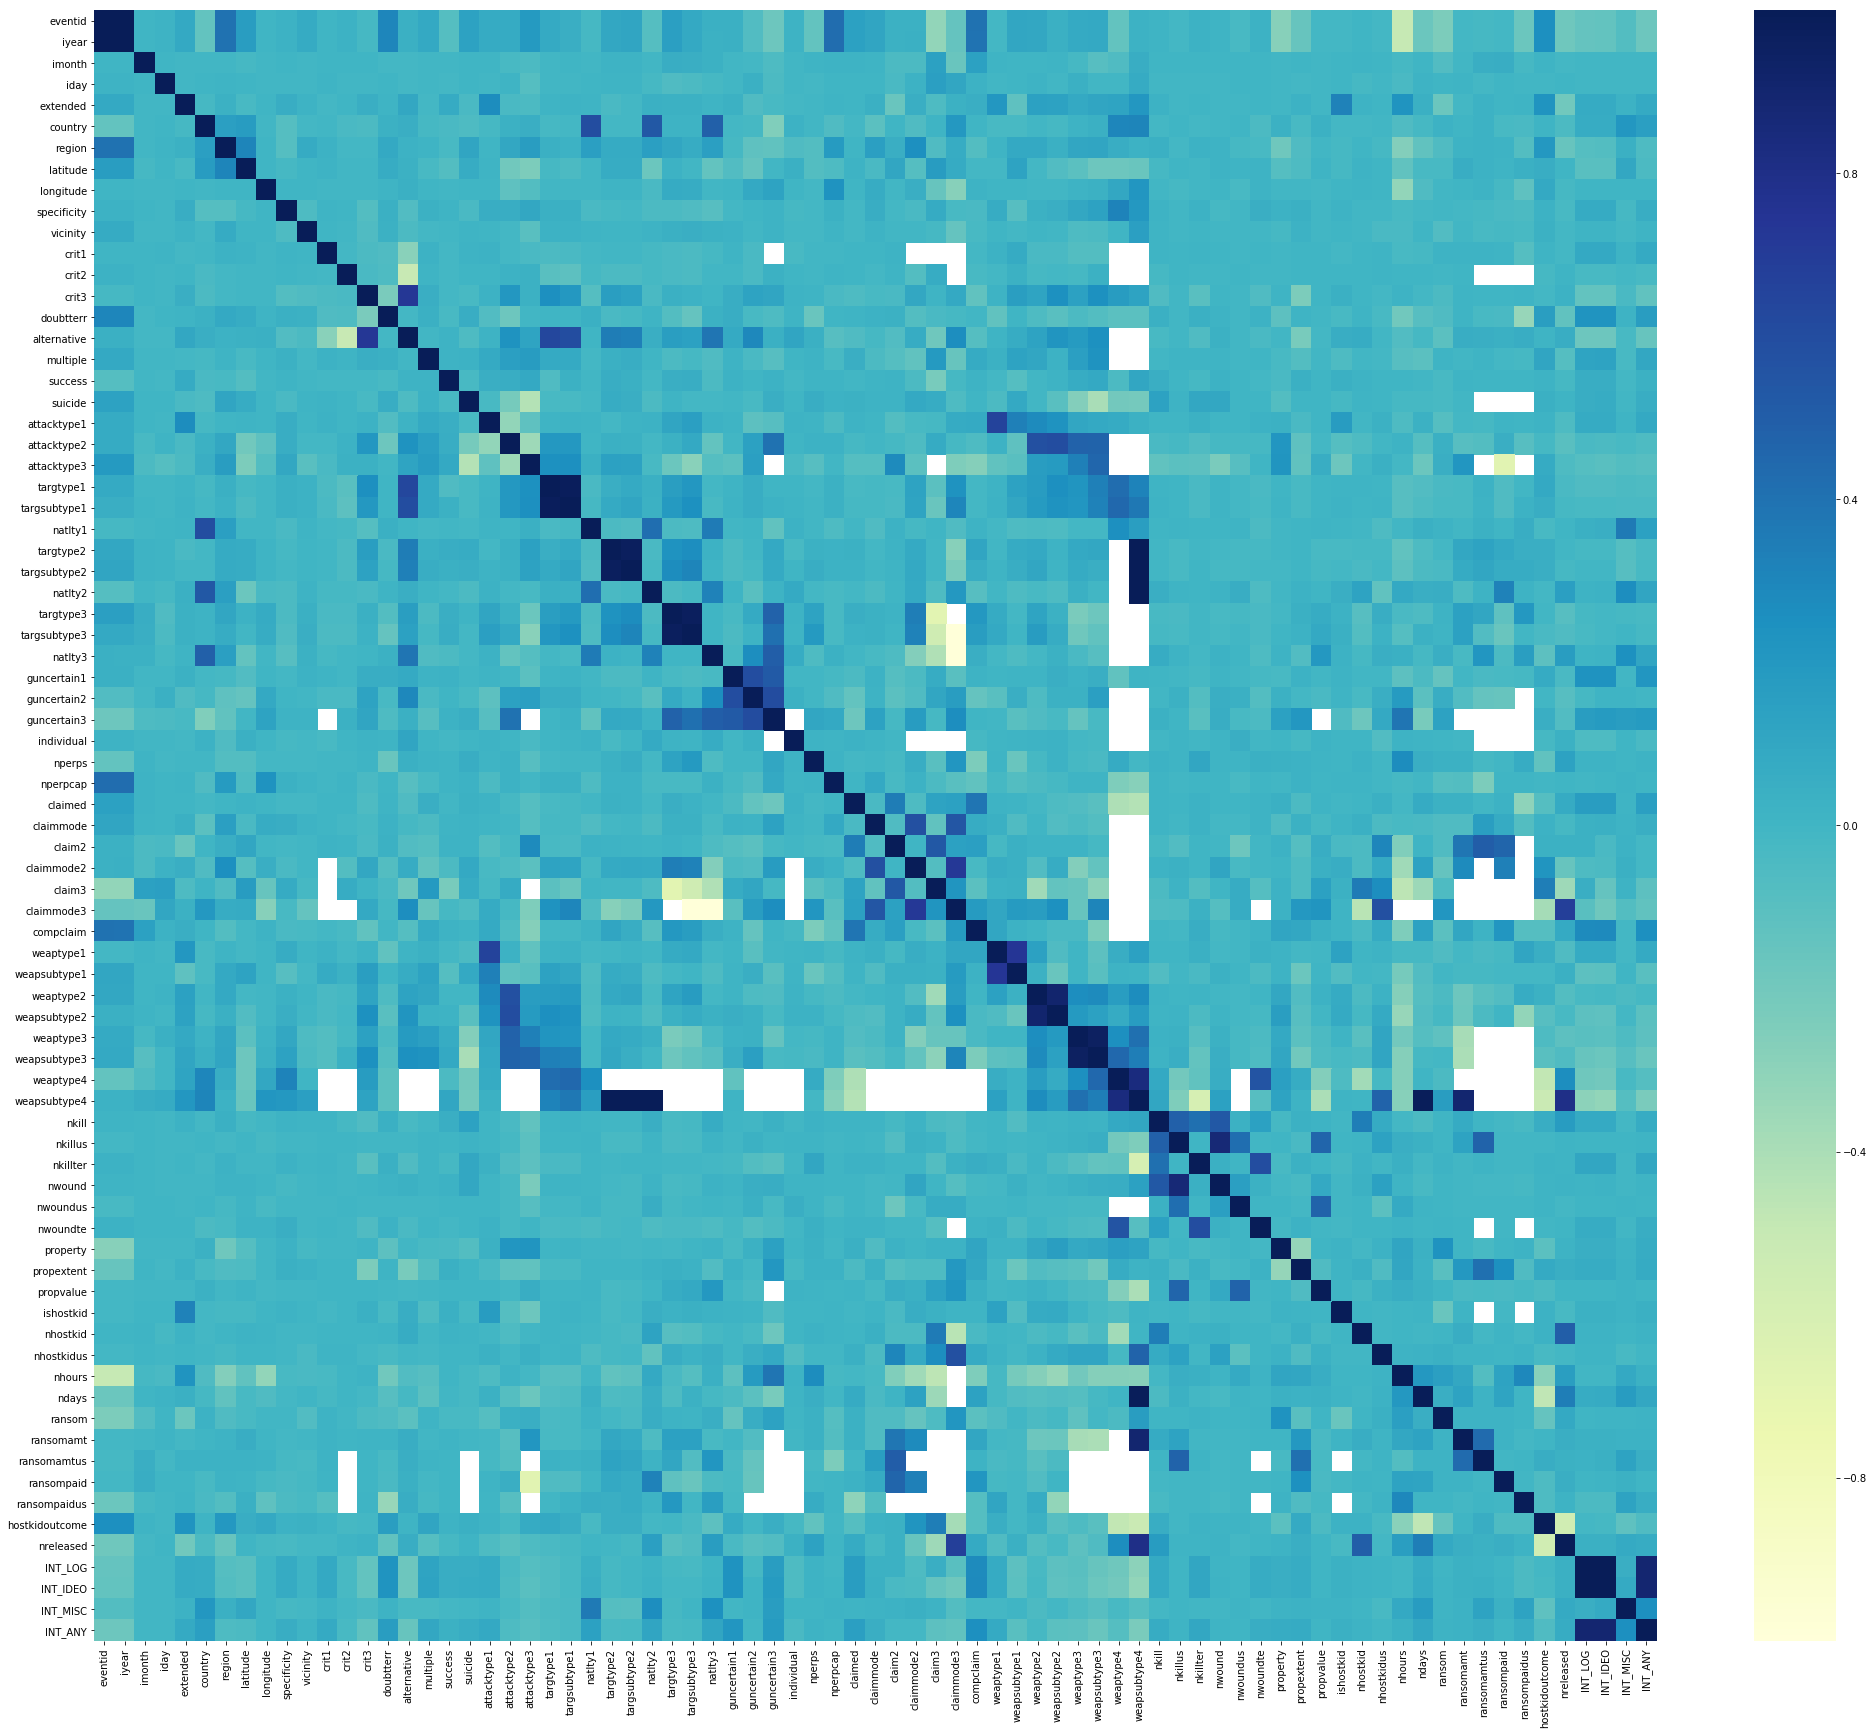

In [10]:
fig, ax = plt.subplots(figsize = (35,30))
sns.heatmap(df.corr(),cmap="YlGnBu")

In [197]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Using just the necessary data

In [5]:
#terror=pd.read_csv('../input/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

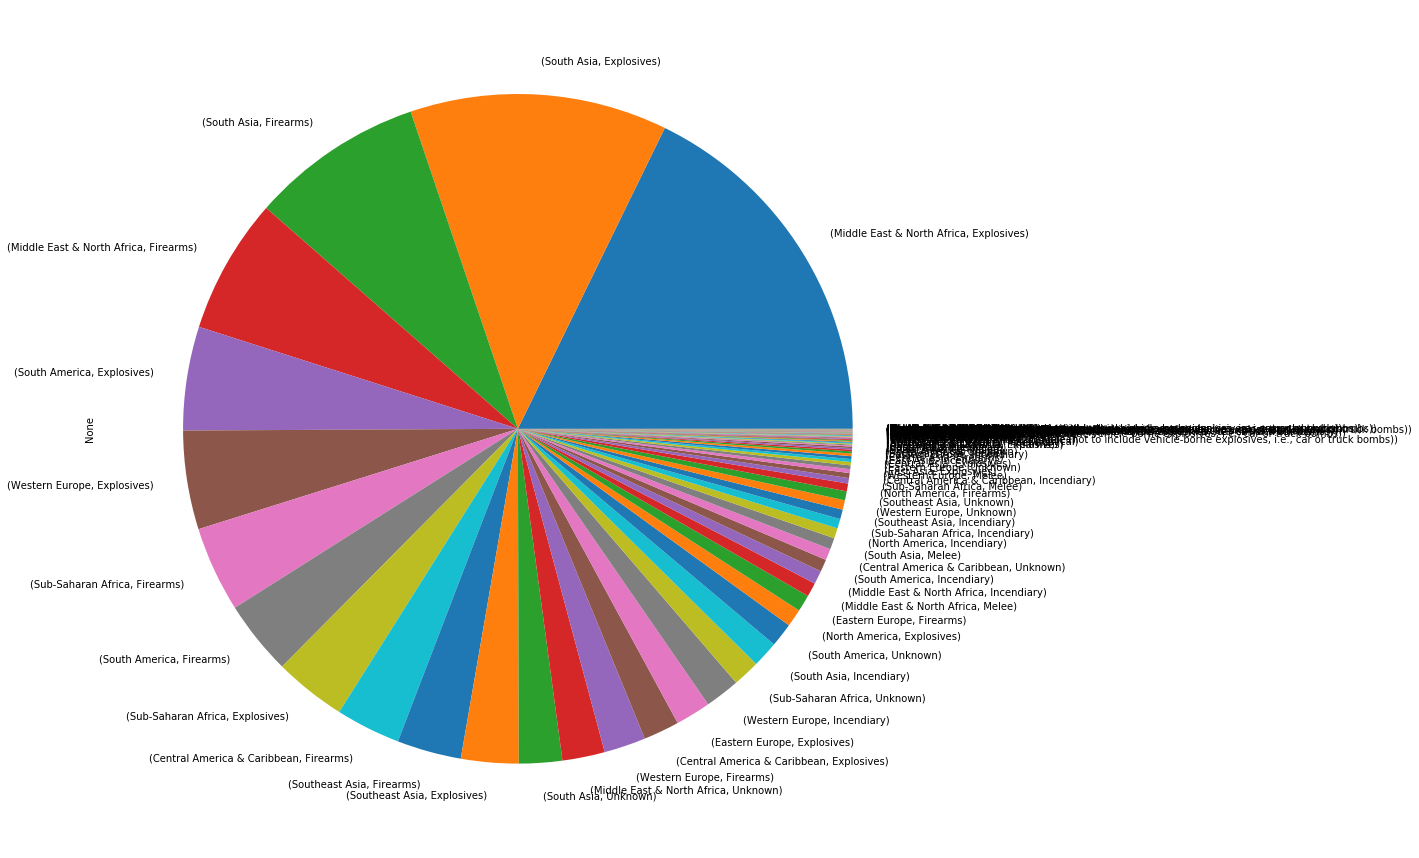

In [15]:
df[['Region', 'Weapon_type']].value_counts().plot.pie(figsize = (15,35))

In [17]:
df['casualities'].value_counts()

0.0       63297
1.0       30157
2.0       15278
3.0       10273
4.0        7549
          ...  
312.0         1
1362.0        1
297.0         1
4224.0        1
396.0         1
Name: casualities, Length: 341, dtype: int64

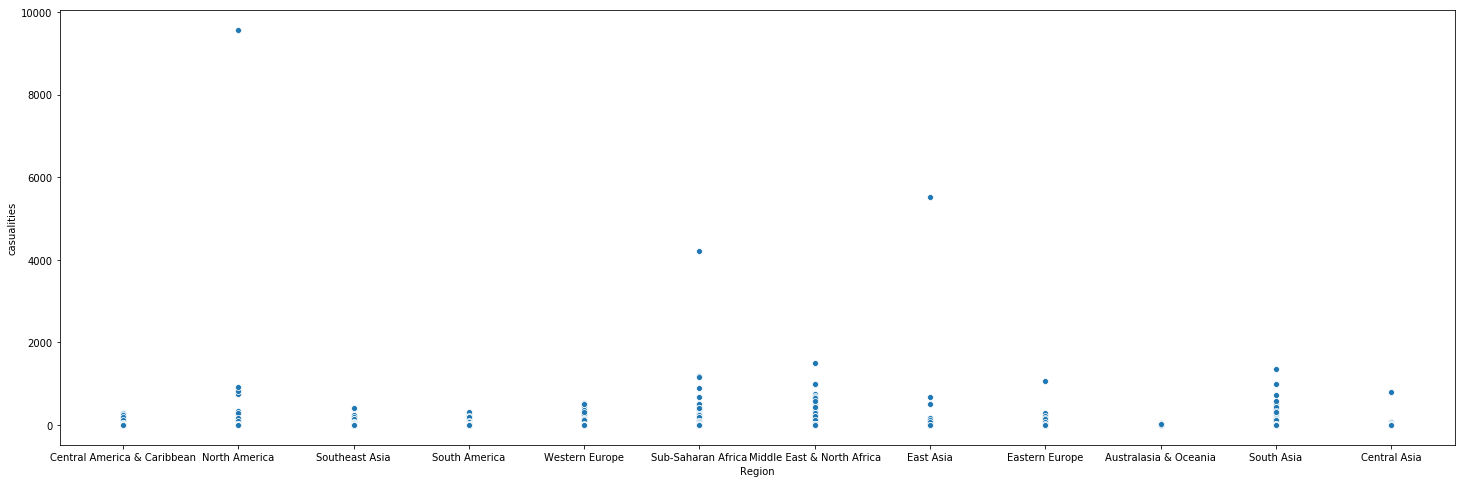

In [23]:
plt.figure(figsize = (25,8))
sns.scatterplot(x = 'Region', y= 'casualities', data = df)

# Weapon used to destroy

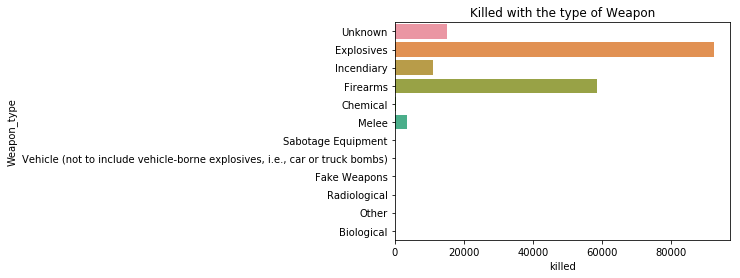

In [15]:
ax = sns.countplot(y="Weapon_type", data=df)
plt.title('Killed with the type of Weapon')
plt.xlabel('killed'); 
plt.ylabel('Weapon_type'); 

There is higher rate of people, more the 8000 are killed thru Explosives like Bomb.

# Region with maximum people killed

In [16]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


# Missing Value Visualizations

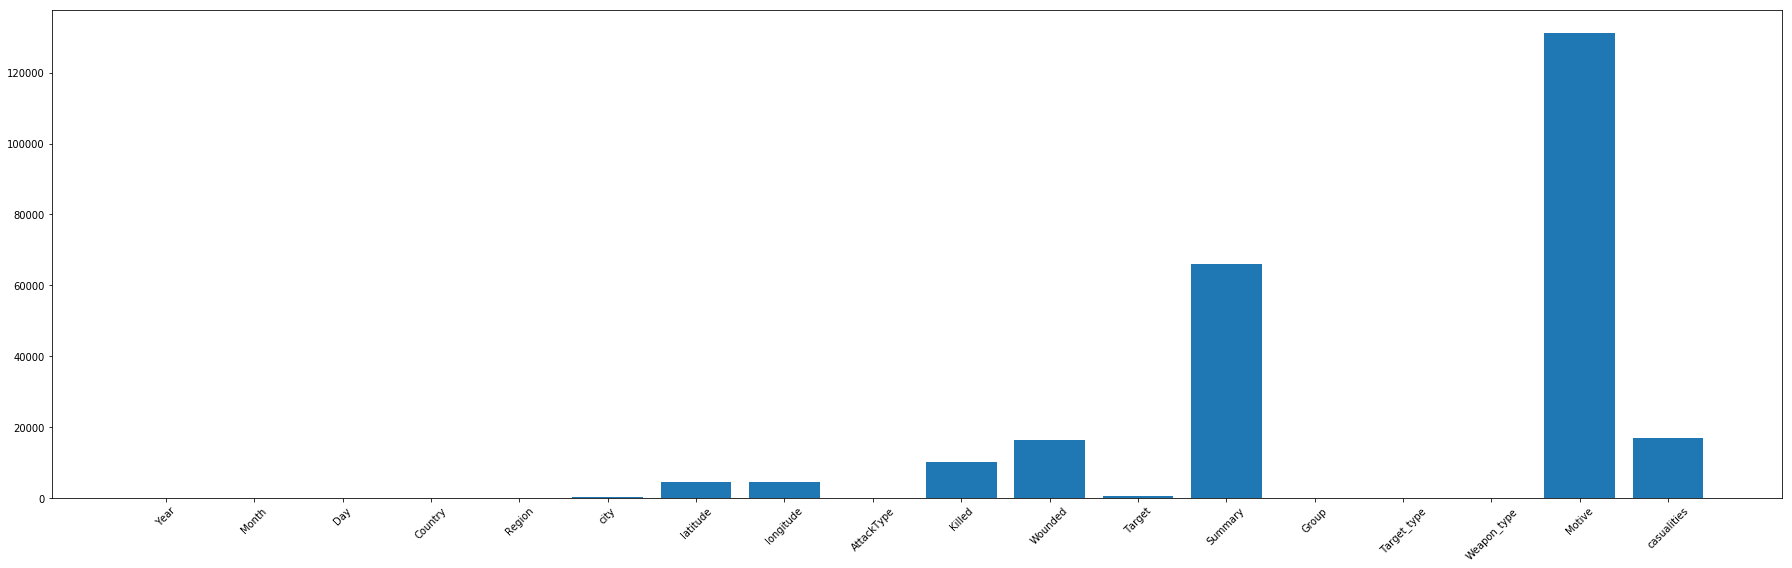

In [17]:
###Visualizing the NULL or NA pr NAN values
fig, ax = plt.subplots(figsize = (25,8))
x = df.isna().sum().index
y = df.isna().sum()
ax.bar(x=x, height = y)
ax.set_xticklabels(x, rotation = 45)
plt.tight_layout()

# Outliers visualizations

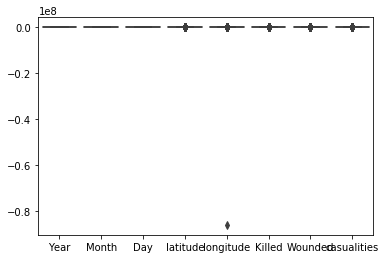

In [20]:
sns.boxplot(data = df)

# Region affected the most in the year

In [18]:
df_region=pd.crosstab(df['Year'],df['Region'])

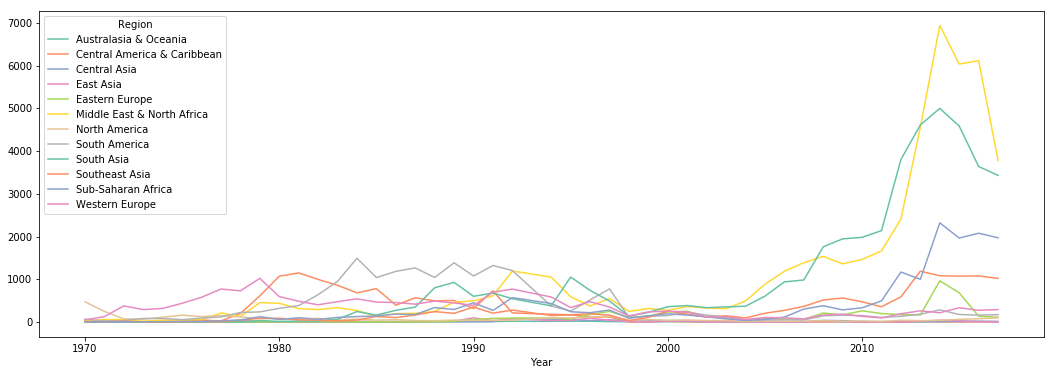

In [19]:
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

As seen already, Middle-East,North Africa,South Asia have seen a shoot in the number of terrorist activities over the years.

# Top Affected Countries

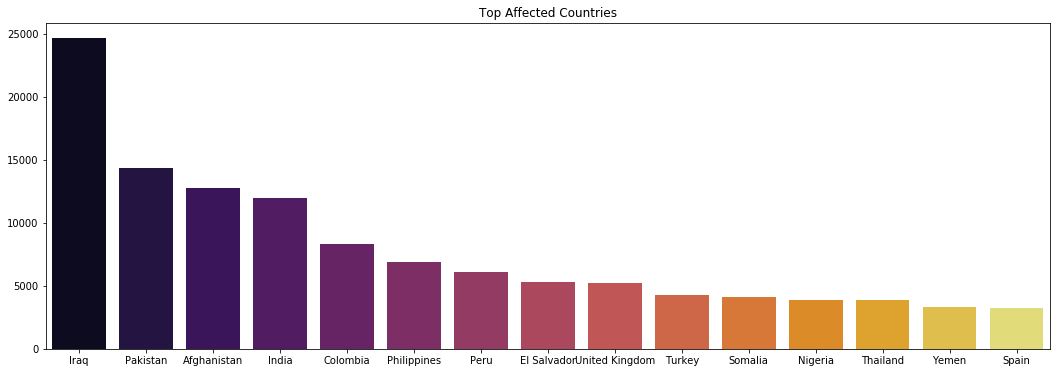

In [29]:
plt.subplots(figsize=(18,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

# Favorite Targets

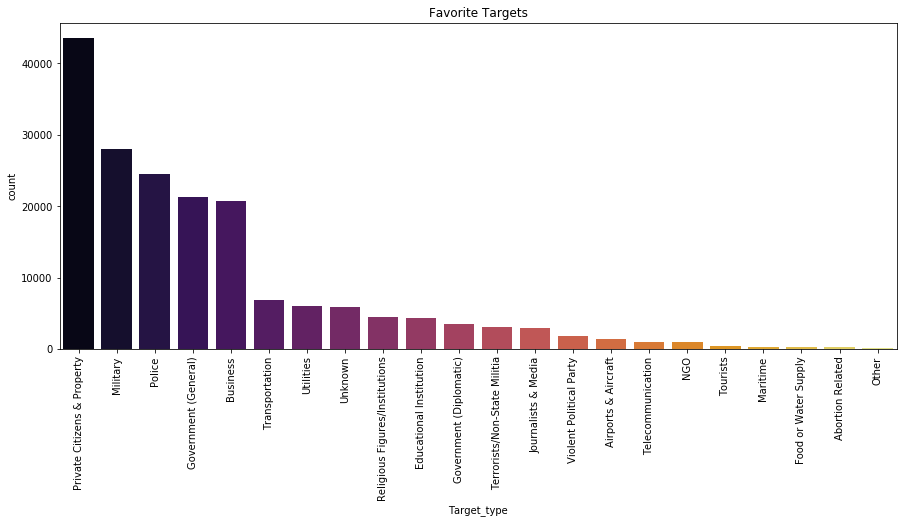

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Target_type'],palette='inferno',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

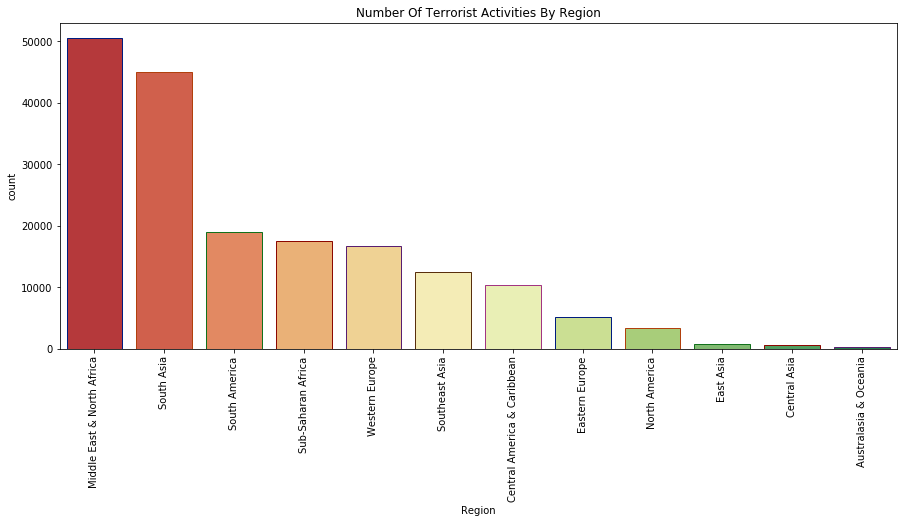

In [31]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

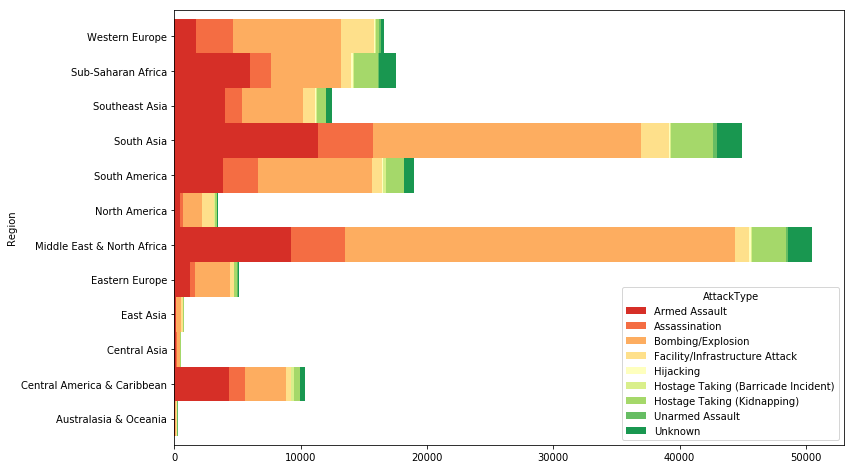

In [32]:
pd.crosstab(df['Region'],df['AttackType']).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

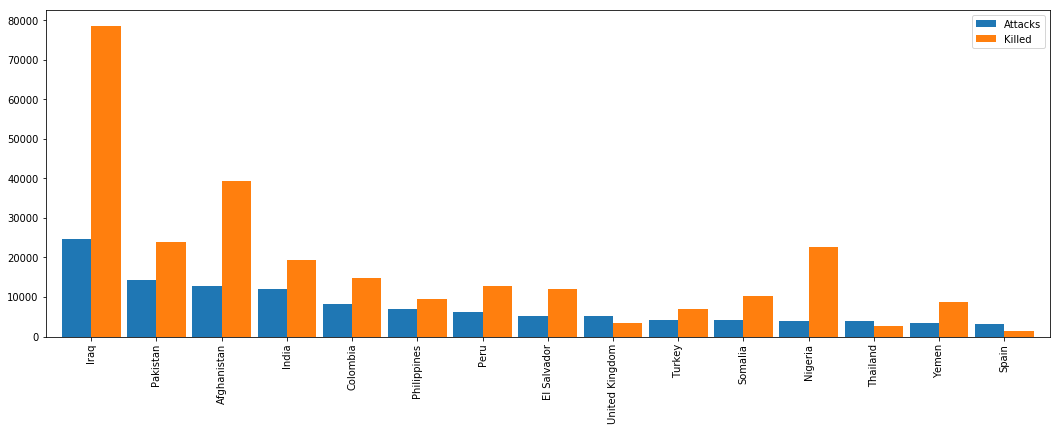

In [33]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Damn!! Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq. Thus the densely populated theory holds good.

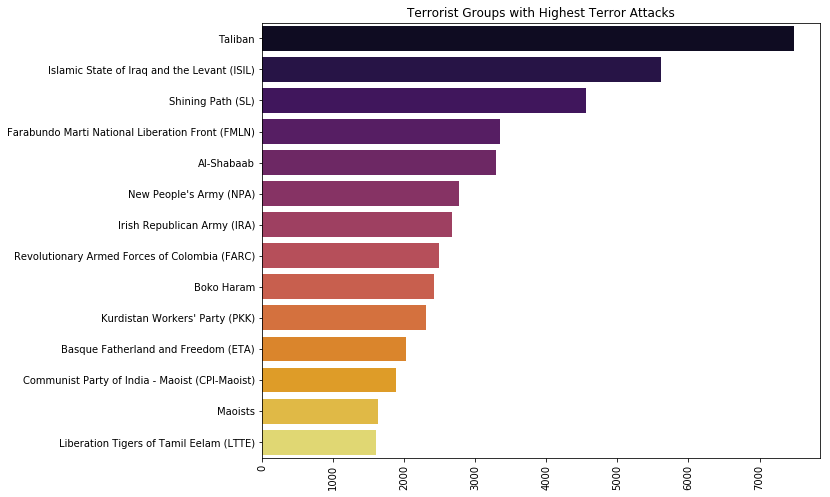

In [34]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

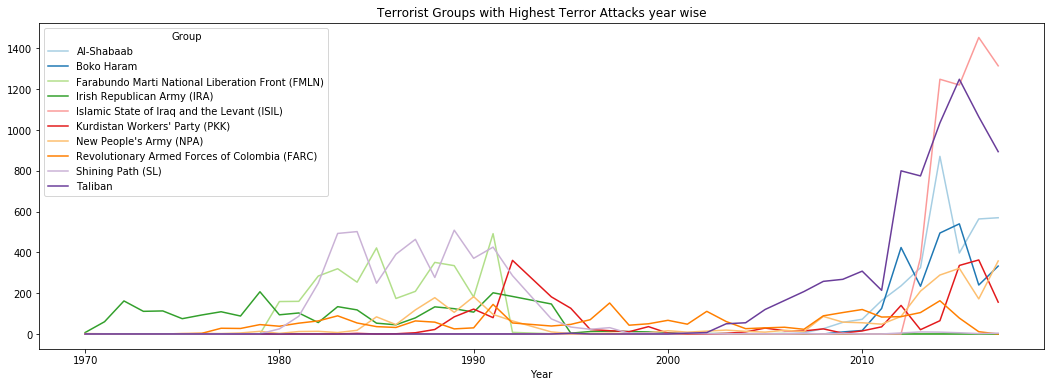

In [35]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Terrorist Groups with Highest Terror Attacks year wise')
plt.show()

The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, maybe after the World War 2 due to the mass killing. However, it has probably stopped its activities in the late 90's. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years


# Favorite terrorist group and Favorite Attack Type

In [36]:
terror_india=df[df['Country']=='India']

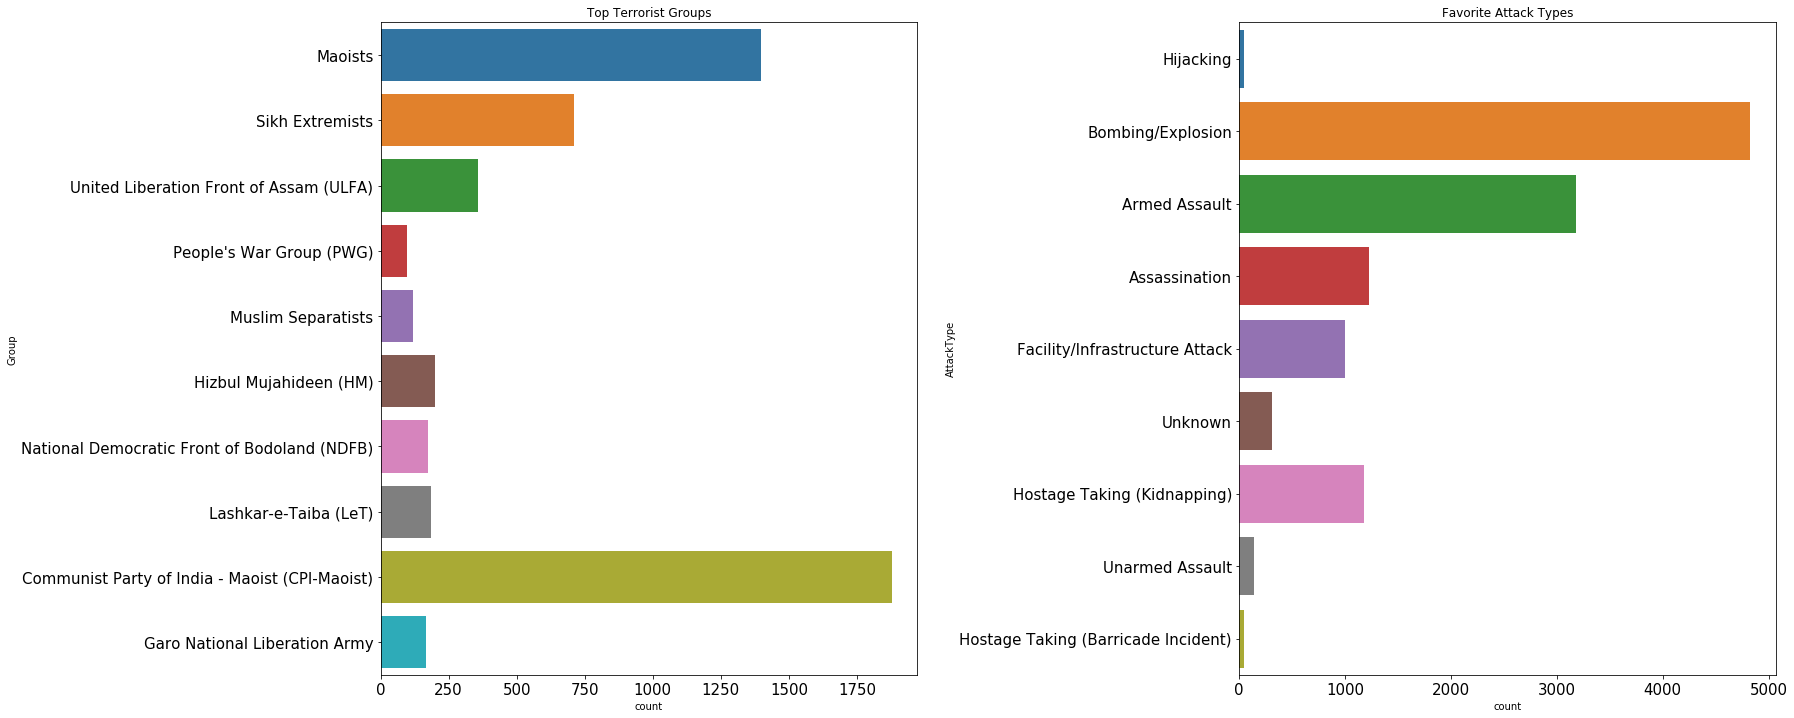

In [37]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

In [67]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [40]:
import matplotlib.pyplot as plt

# Motive of terrorism act applying NLP

In [41]:
df['Motive'].value_counts()

Unknown                                                                                                                                                                                                                                             14889
The specific motive for the attack is unknown.                                                                                                                                                                                                      14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                    297
The specific motive for the attack is unknown..                                                                                                                                                                                                       148


In [42]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

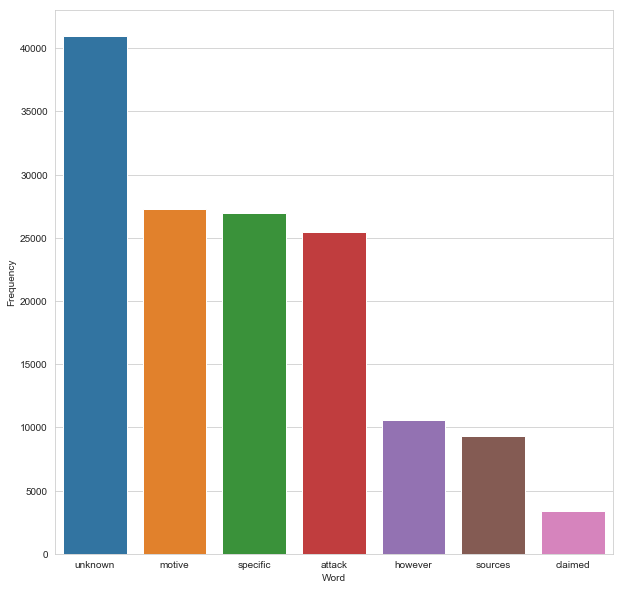

In [43]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Motive'].str.lower().str.cat(sep=' ')


# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [44]:
#stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['unknown','specific','motive','attack', 'however', 'sources', 'part', 'incident', 'claimed', 'stated', 'carried', 'noted', 'larger', 'trend', 'violence', 'may', 'responsibility', 'targeted', 'force', 'security', 'new', 'people', 'state',
               'victim','area', 'government', 'suspected', 'speculated', 'member', 'group', 'killed','posited', 'communist', 'party', 'iraq',
               'forces', 'army', 'algeria', 'attacks','victims', 'related', 'military', 'members', 'united states']
stop_words.extend(newStopWords)

In [45]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

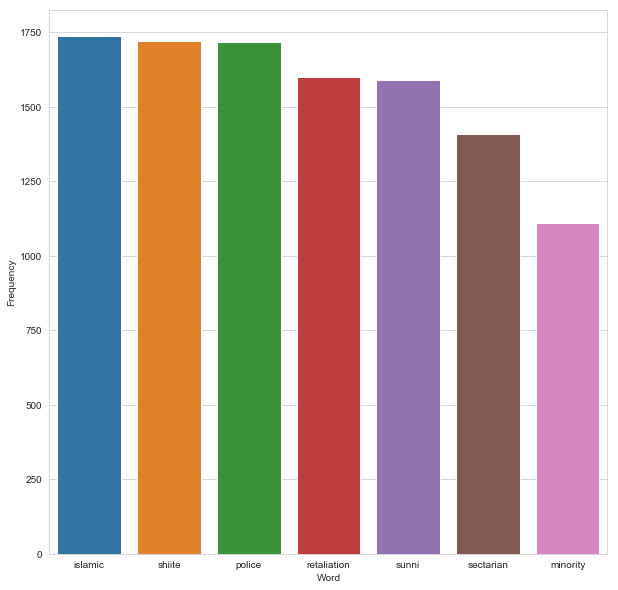

In [46]:
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

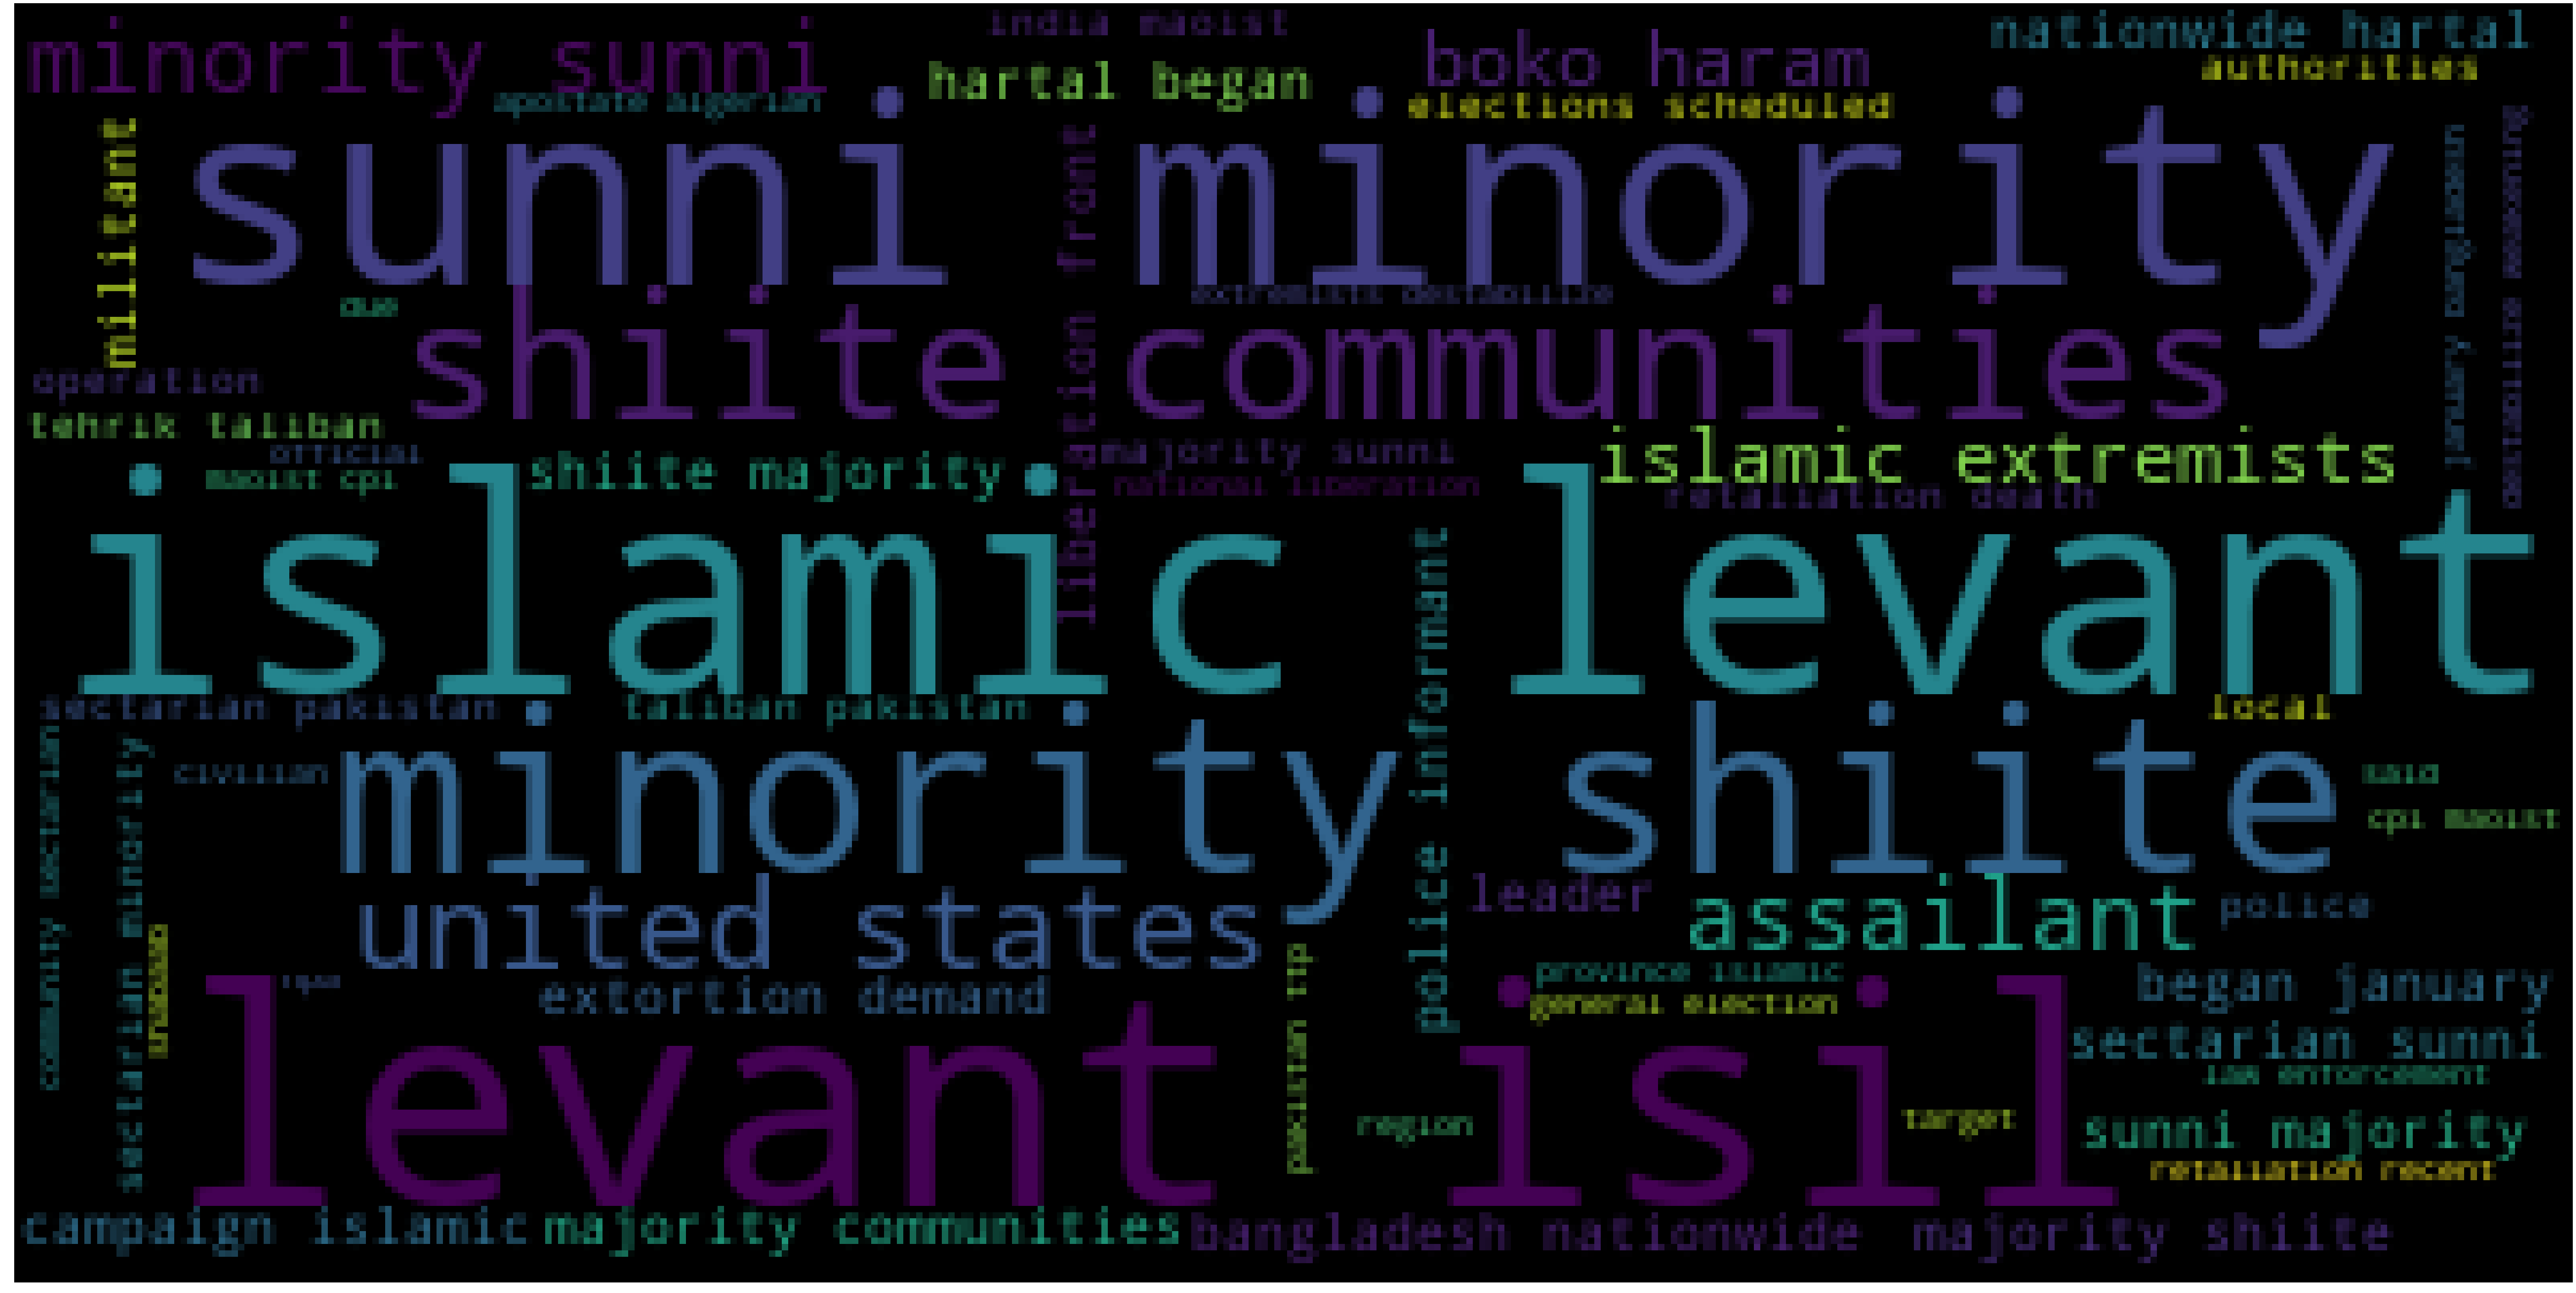

In [47]:
def wc(df,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')
wc(df = cleaned_data_title, bgcolor='black',title='Common Words' )

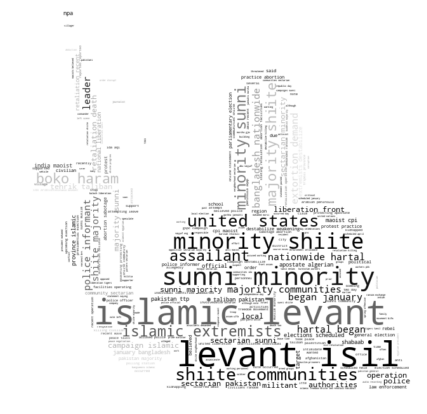

In [48]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
d = getcwd()
## join all documents in corpus
text = " ".join(cleaned_data_title)
## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "t.png")))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

In [166]:
###The fights between Shiite and Sunni communities are responsible for the fights.
##Levant ISIL are responsible for the attacks

# Summary

In [ ]:
df['Summary'].value_counts()

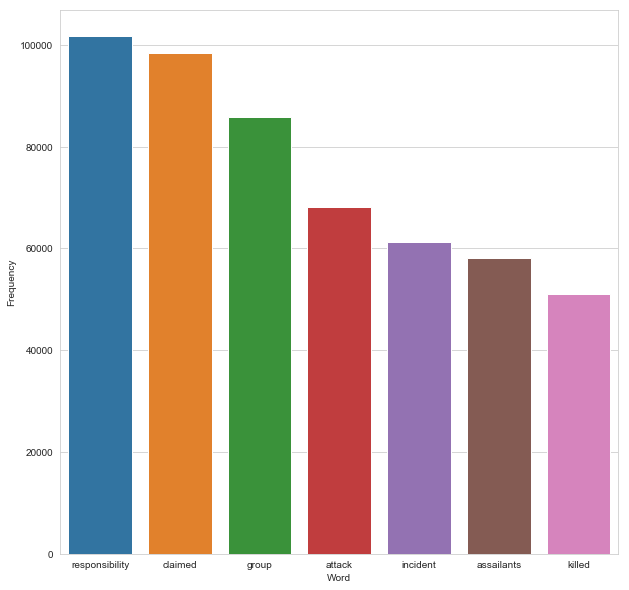

In [54]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Summary'].str.lower().str.cat(sep=' ')


# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [55]:
#stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['unknown','specific','motive','attack', 'however', 'sources', 'part', 'incident', 'claimed', 'stated', 'carried', 'noted', 'larger', 'trend', 'violence', 'may', 'responsibility', 'targeted', 'force', 'security', 'new', 'people', 'state',
               'victim','area', 'government', 'suspected', 'speculated', 'member', 'group', 'killed','posited', 'communist', 'party', 'iraq',
               'forces', 'army', 'algeria', 'attacks','victims', 'related', 'military', 'members', 'united states']
stop_words.extend(newStopWords)

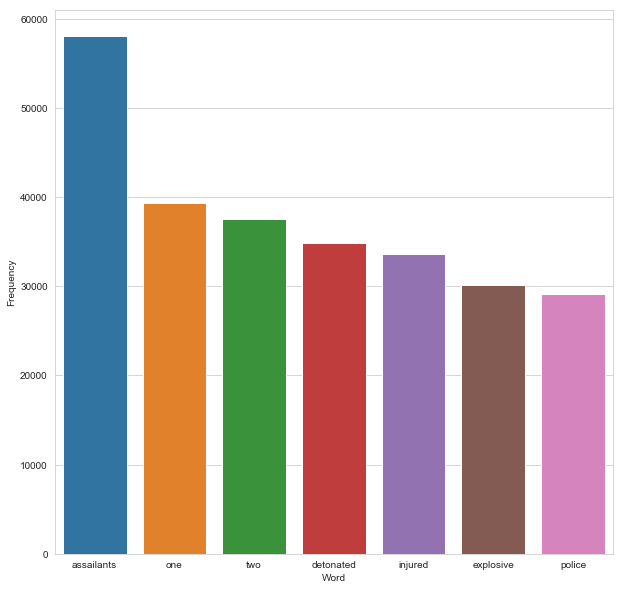

In [56]:
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

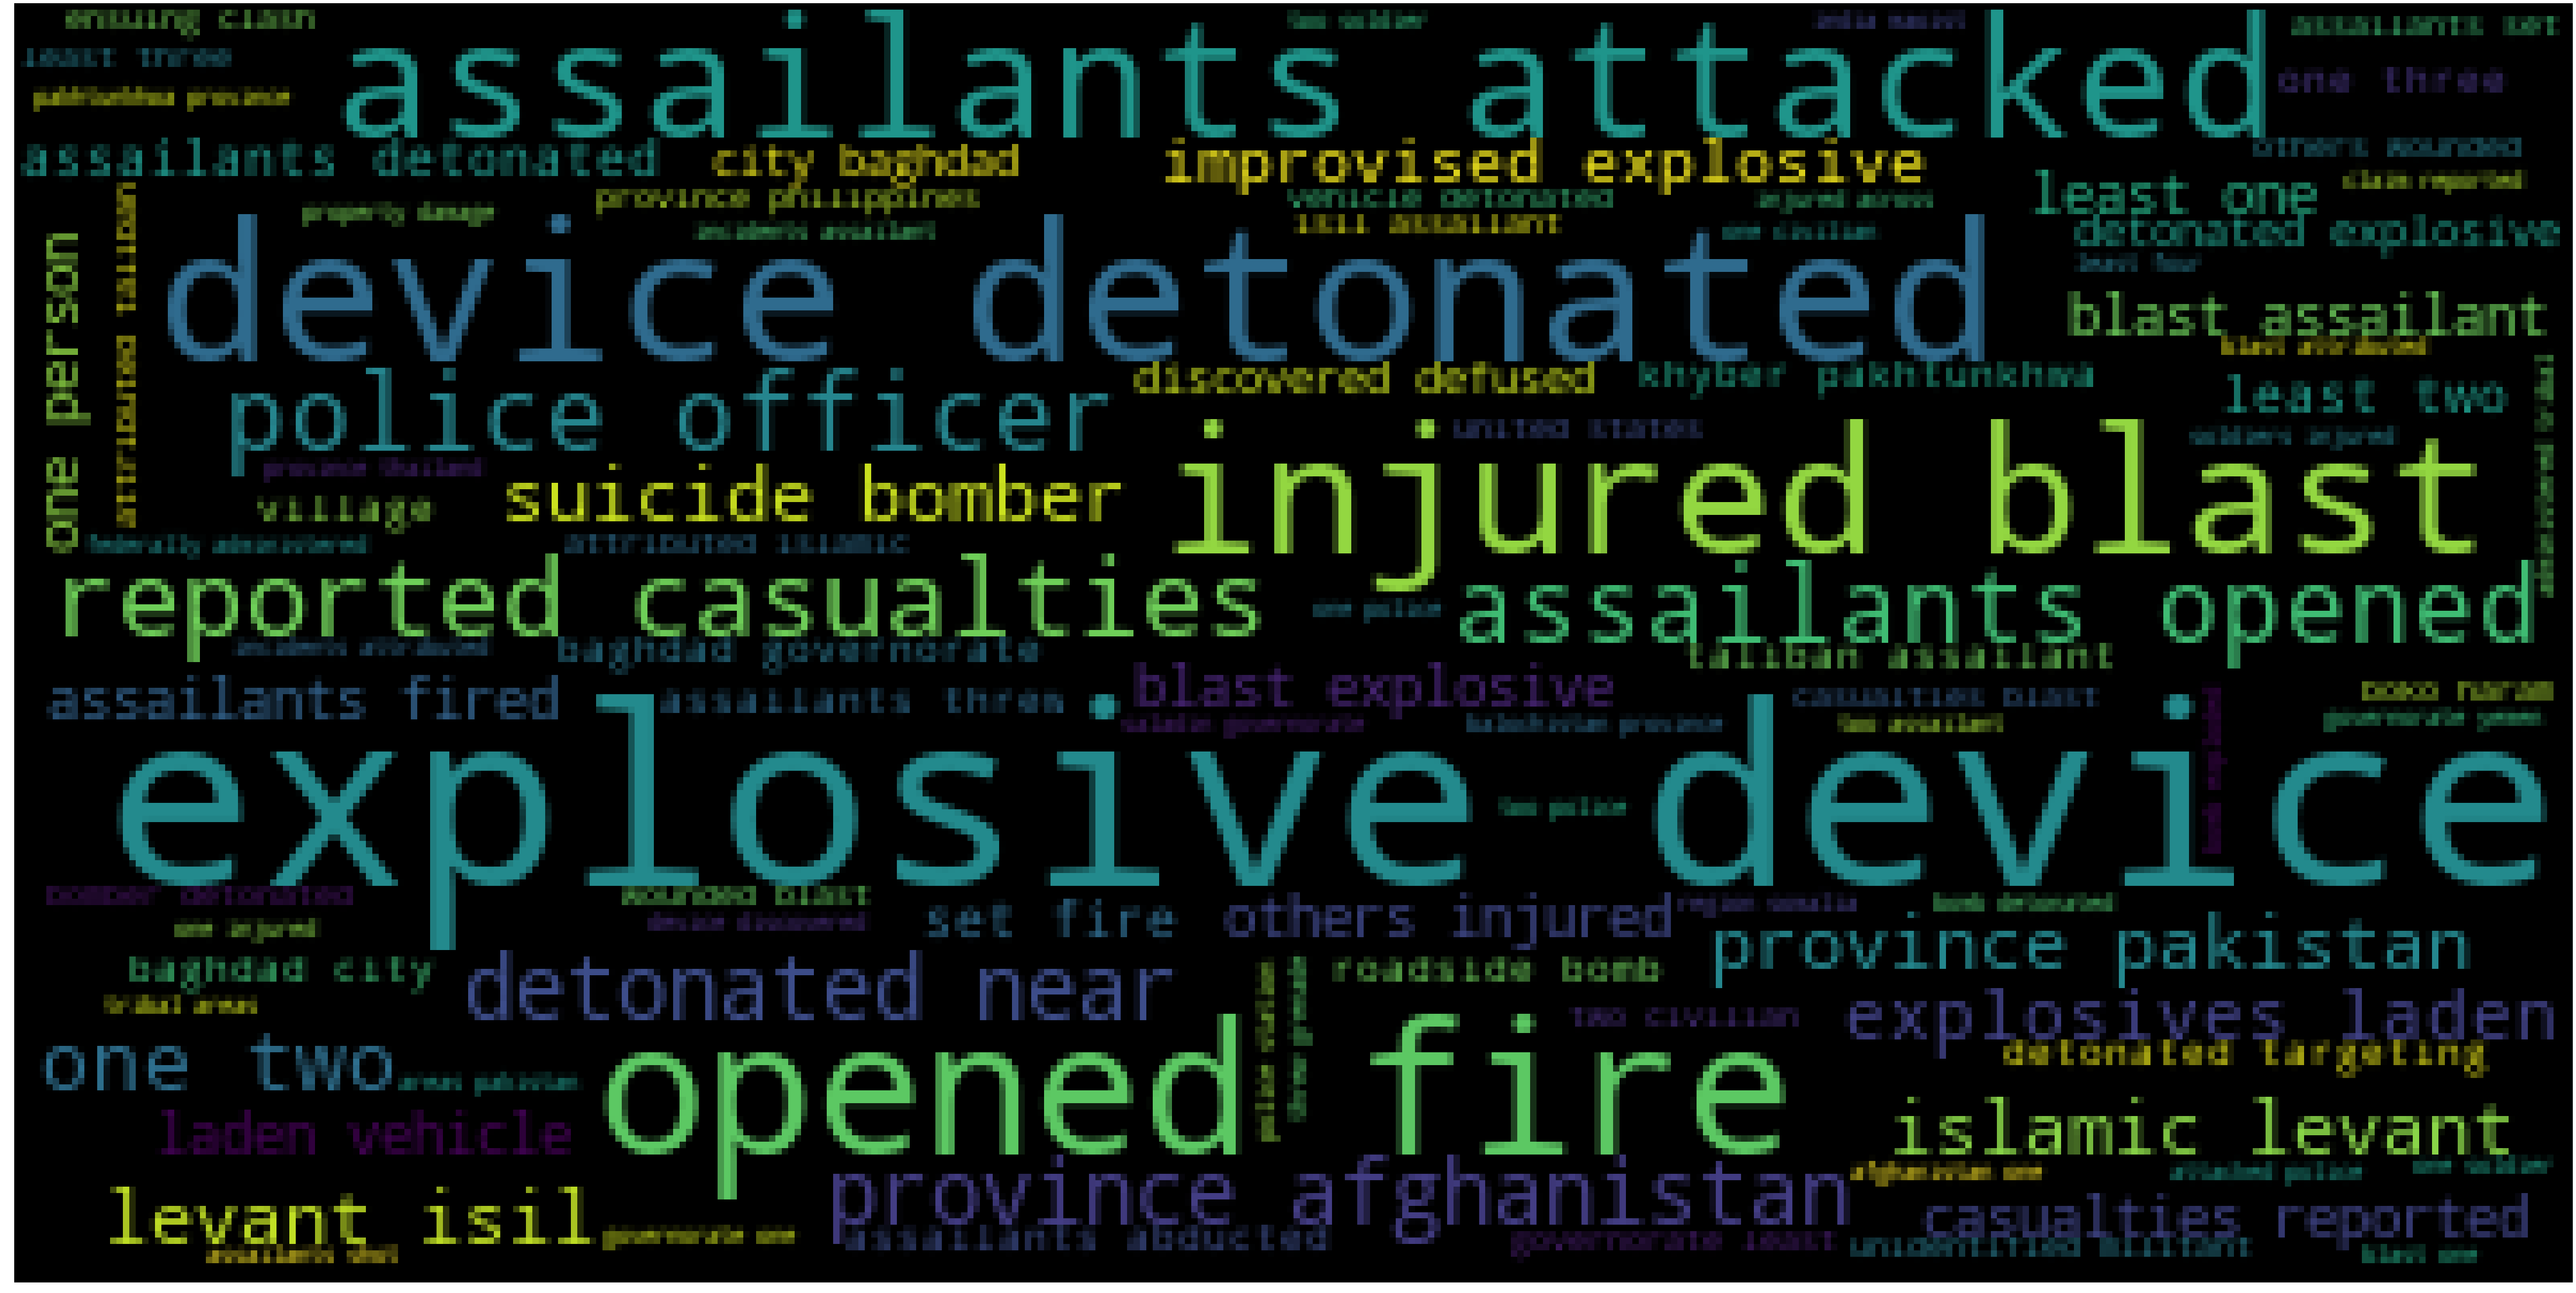

In [57]:
def wc(df,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')
wc(df = cleaned_data_title, bgcolor='black',title='Common Words' )

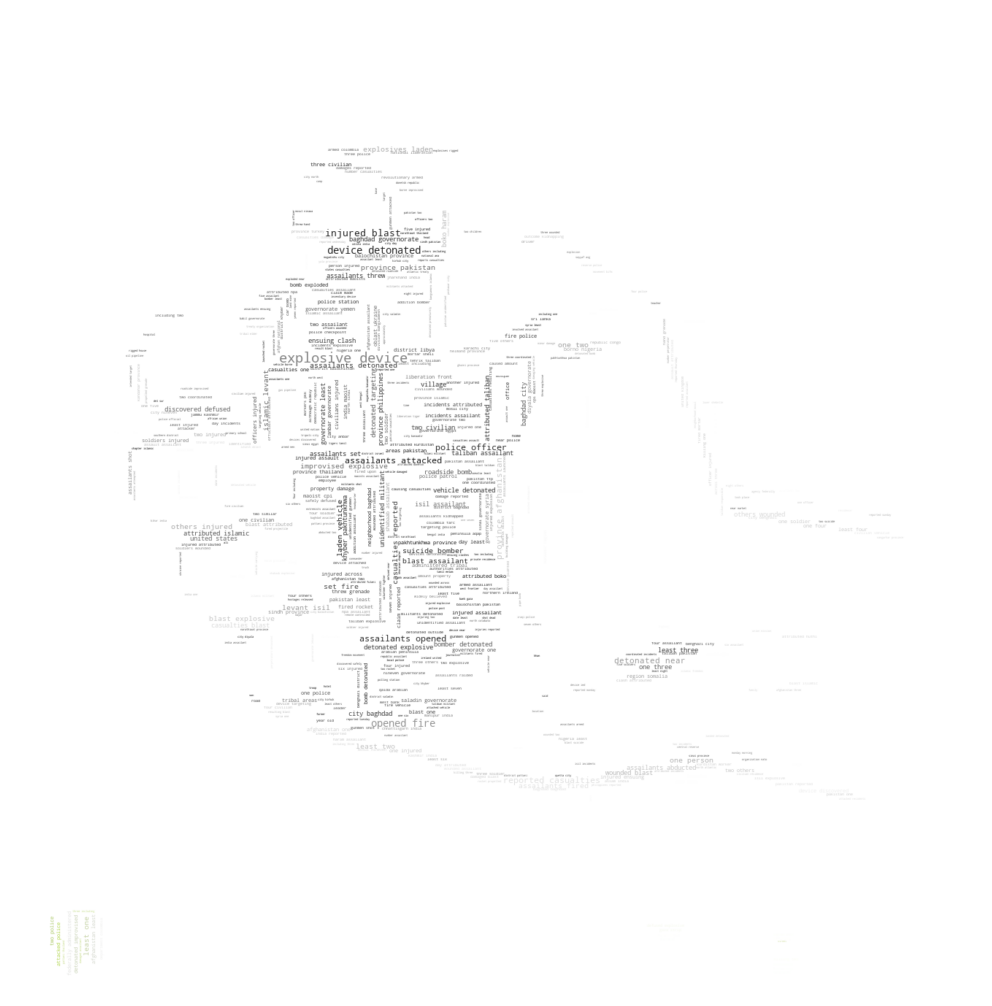

In [65]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
d = getcwd()
## join all documents in corpus
text = " ".join(cleaned_data_title)
## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "granadehand.jpg")))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[17,20])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

##The attack was done with explosive devices, opened fired and suicide bombers
#Most of the attacks are related blasts
##It is assailants attack, Levant ISIL is responsible mostly

In [69]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')

In [70]:
df.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

# Terrorism in India

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output

MovieWriter imagemagick unavailable. Trying to use pillow instead.



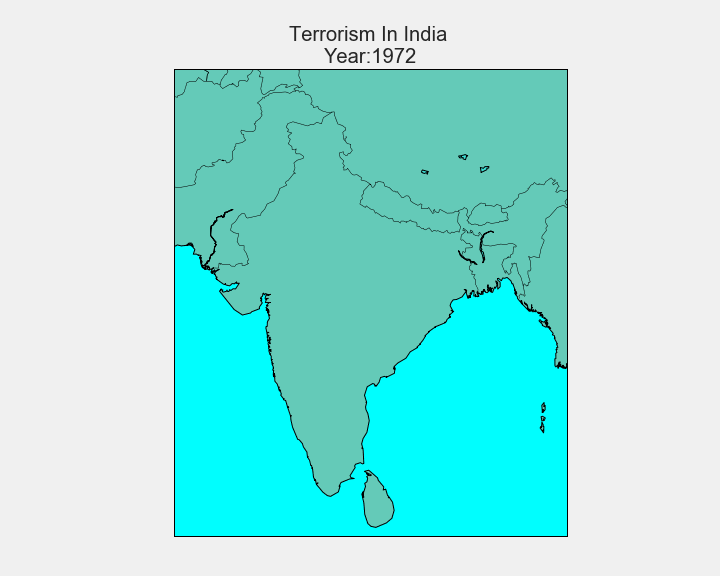

In [118]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In India '+'\n'+'Year:' +str(Year))
    m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
    lat_gif=list(df[df['Year']==Year].latitude)
    long_gif=list(df[df['Year']==Year].longitude)
    x_gif,y_gif=m5(long_gif,lat_gif)
    m5.scatter(x_gif, y_gif,s=[killed+wounded for killed,wounded in zip(terror_india[terror_india['Year']==Year].Killed,terror_india[terror_india['Year']==Year].Wounded)],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(terror_india.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# Global terrorism

MovieWriter imagemagick unavailable. Trying to use pillow instead.



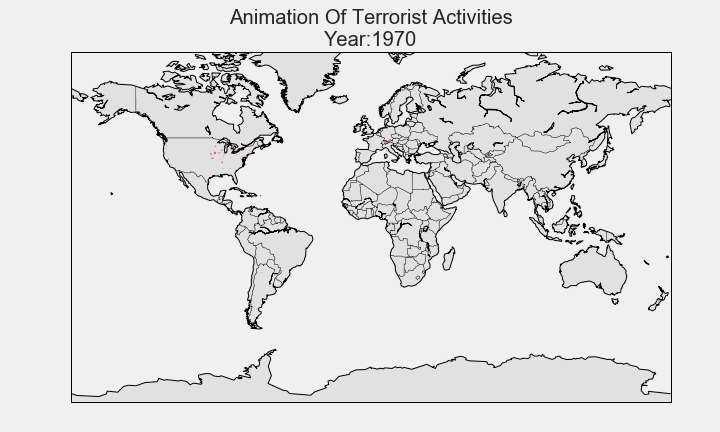

In [121]:
fig = plt.figure(figsize = (10,6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(df[df['Year']==Year].latitude)
    long6=list(df[df['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(df[df['Year']==Year].Killed,df[df['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(df.Year.unique()), interval =2500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

#It is visible that the Middle-East and Southern-Asia are the regions with highest terrorist activites, 
not only in numbers, but also in casualities. It is spreading largely across the globe but in the past few years, Iraq, India, 
Pakistan and Afghanistan have witnessed an increase in such number of activities.


##USA should take major precautions and increase their security

##The intelligence and security services of India should increase their capacities.
##Additional security or mock drills shall be increased on passports and visas.

##Any suspicious act by any civilan or student or any unattended things notice, shall be reported to the security officials.
##Every citizen of the country shall contribute to their country's security. So awareness campaigns shall be implemented.


# Thank You...